## Segmentation of healthy leaf and leaf area calculation

In [10]:
import os
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
""" Dataset path"""
leaf_data_path = "/Users/aic/Downloads/kebna_january_data_1" #"../Data/leaf"
os.path.exists(leaf_data_path)

True

In [88]:
images = glob.glob(leaf_data_path+"/*.jpg")
images

['/Users/aic/Downloads/kebna_january_data_1/114127.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/7_103957.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/113847.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/114319.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/115007.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/105228.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/111315.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/113502.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/104730.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/105604.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/114047.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/111856.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/114913.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/112351.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/111102.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/104057.jpg',
 '/Users/aic/Downloads/kebna_january_data_1/120730.jpg',
 '/Users/aic/Downloads/kebna_

In [89]:
class SegmentLeaf:
    def __init__(self):
        pass
        
    def __call__(self,image): 
        mask = self.remove_background(image)
        contour,area = self.find_contour(mask)
        return mask,contour,area
    
    def remove_background(self,image):
        # Gaussia blur
        blured = cv2.GaussianBlur(image,(1,1),0)
        # Convert RGB image to HSV
        leaf_hsv = cv2.cvtColor(blured,cv2.COLOR_BGR2HSV)
        # Get mask from the S and V channels
        SV_channel = leaf_hsv.copy()
        # Set the H channel to zero
        SV_channel[...,0] = np.zeros((leaf_hsv.shape[0],leaf_hsv.shape[1]))
        # get binary mask
        mask = cv2.inRange(SV_channel,(0,0,80),(0,90,255))
        # Invert mask, White areas represent green components and black the background
        mask = cv2.bitwise_not(mask)
        return mask
    
    def find_contour(self,mask):
        # find all contours on the maks
        contours, heirarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # filter the largest contour
        largest_contour = max(contours,key=cv2.contourArea)
        #print(largest_contour)
        # get area of the largest contour
        contour_area = cv2.contourArea(largest_contour)
        return largest_contour,contour_area

#### Segment sample image

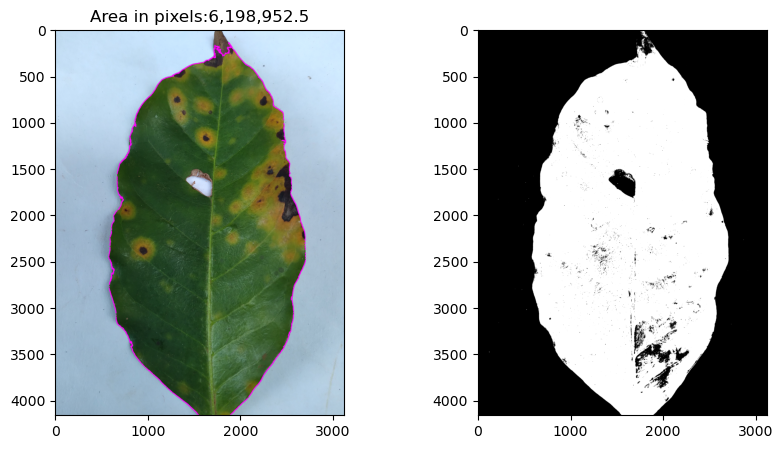

In [119]:
# read image
image = cv2.imread(random.choice(images))
# bgr to rgb
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Init leaf segment
segment = SegmentLeaf()
mask,contour,area = segment(image)
# Overlay image and mask
segmented_leaf = cv2.bitwise_and(image,image,mask=mask)
cv2.drawContours(image, contour, -1, (255,0,255), 10)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title(f"Area in pixels:{area:,}")
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(mask,cmap="gray")
plt.show()